In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import folium
import json

In [2]:
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "AppleGothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

mpl.rcParams["axes.unicode_minus"] = False

['AppleGothic']


In [3]:
pop_1 = pd.read_csv("datas/population_all_gangnam.csv", encoding="cp949")
pop_1.columns = (
    pop_1.columns.str.replace('2025년03월_', '', regex=False)
)
pop_1

,행정구역,거주자 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 강남구 (1168000000),"550,080","240,064",2.29,"262,712","287,368",0.91
1,서울특별시 강남구 신사동(1168051000),"14,935","6,422",2.33,"6,959","7,976",0.87
2,서울특별시 강남구 논현1동(1168052100),"20,184","12,985",1.55,"9,526","10,658",0.89
3,서울특별시 강남구 논현2동(1168053100),"19,591","10,801",1.81,"9,085","10,506",0.86
4,서울특별시 강남구 압구정동(1168054500),"25,141","9,715",2.59,"11,668","13,473",0.87
5,서울특별시 강남구 청담동(1168056500),"23,481","10,229",2.30,"10,906","12,575",0.87
6,서울특별시 강남구 삼성1동(1168058000),"12,274","5,227",2.35,"5,994","6,280",0.95
7,서울특별시 강남구 삼성2동(1168059000),"29,840","13,445",2.22,"14,226","15,614",0.91
8,서울특별시 강남구 대치1동(1168060000),"23,766","7,147",3.33,"11,925","11,841",1.01
9,서울특별시 강남구 대치2동(1168061000),"37,913","13,070",2.90,"19,275","18,638",1.03


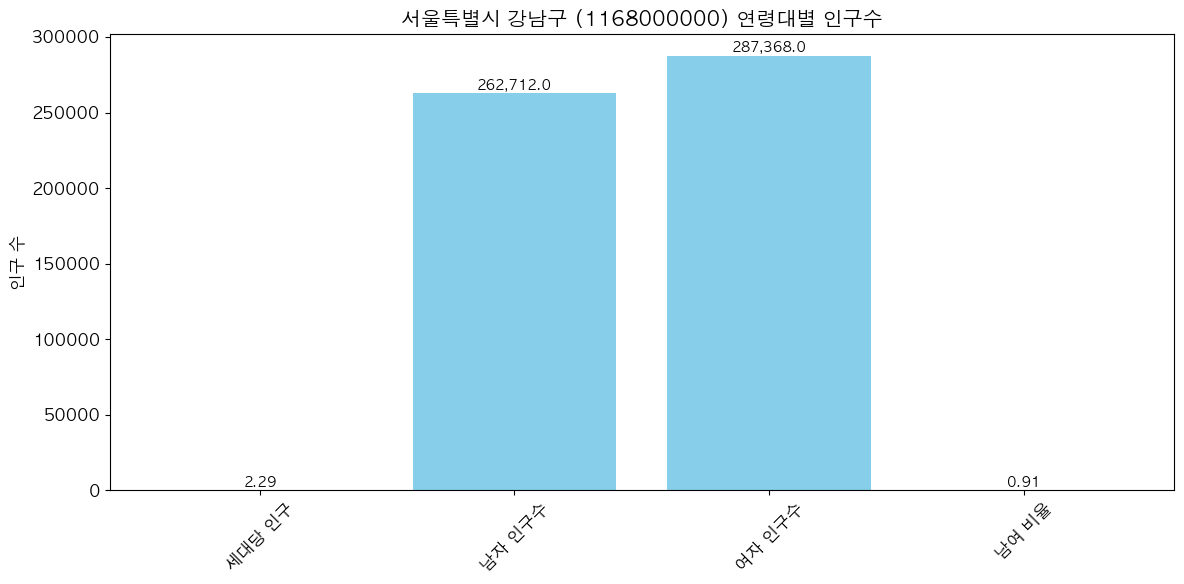

In [4]:
age_cols = pop_1.columns[3:14]
age_values = pop_1.iloc[0, 3:14].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
x_labels = [col.replace("계_", "") for col in age_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, age_values, color='skyblue')
plt.xticks(rotation=45)
plt.title(f"{pop_1.iloc[0, 0]} 연령대별 인구수")
plt.ylabel("인구 수")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 400,  # 막대보다 약간 위에
        f'{height:,}',  # 천 단위 쉼표 표시
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [5]:
pop_2 = pd.read_csv("datas/population_all_gangnam.csv", encoding="cp949")
pop_2.columns = (
    pop_2.columns.str.replace('2025년03월_', '', regex=False)
)
pop_2

,행정구역,거주자 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 강남구 (1168000000),"550,080","240,064",2.29,"262,712","287,368",0.91
1,서울특별시 강남구 신사동(1168051000),"14,935","6,422",2.33,"6,959","7,976",0.87
2,서울특별시 강남구 논현1동(1168052100),"20,184","12,985",1.55,"9,526","10,658",0.89
3,서울특별시 강남구 논현2동(1168053100),"19,591","10,801",1.81,"9,085","10,506",0.86
4,서울특별시 강남구 압구정동(1168054500),"25,141","9,715",2.59,"11,668","13,473",0.87
5,서울특별시 강남구 청담동(1168056500),"23,481","10,229",2.30,"10,906","12,575",0.87
6,서울특별시 강남구 삼성1동(1168058000),"12,274","5,227",2.35,"5,994","6,280",0.95
7,서울특별시 강남구 삼성2동(1168059000),"29,840","13,445",2.22,"14,226","15,614",0.91
8,서울특별시 강남구 대치1동(1168060000),"23,766","7,147",3.33,"11,925","11,841",1.01
9,서울특별시 강남구 대치2동(1168061000),"37,913","13,070",2.90,"19,275","18,638",1.03


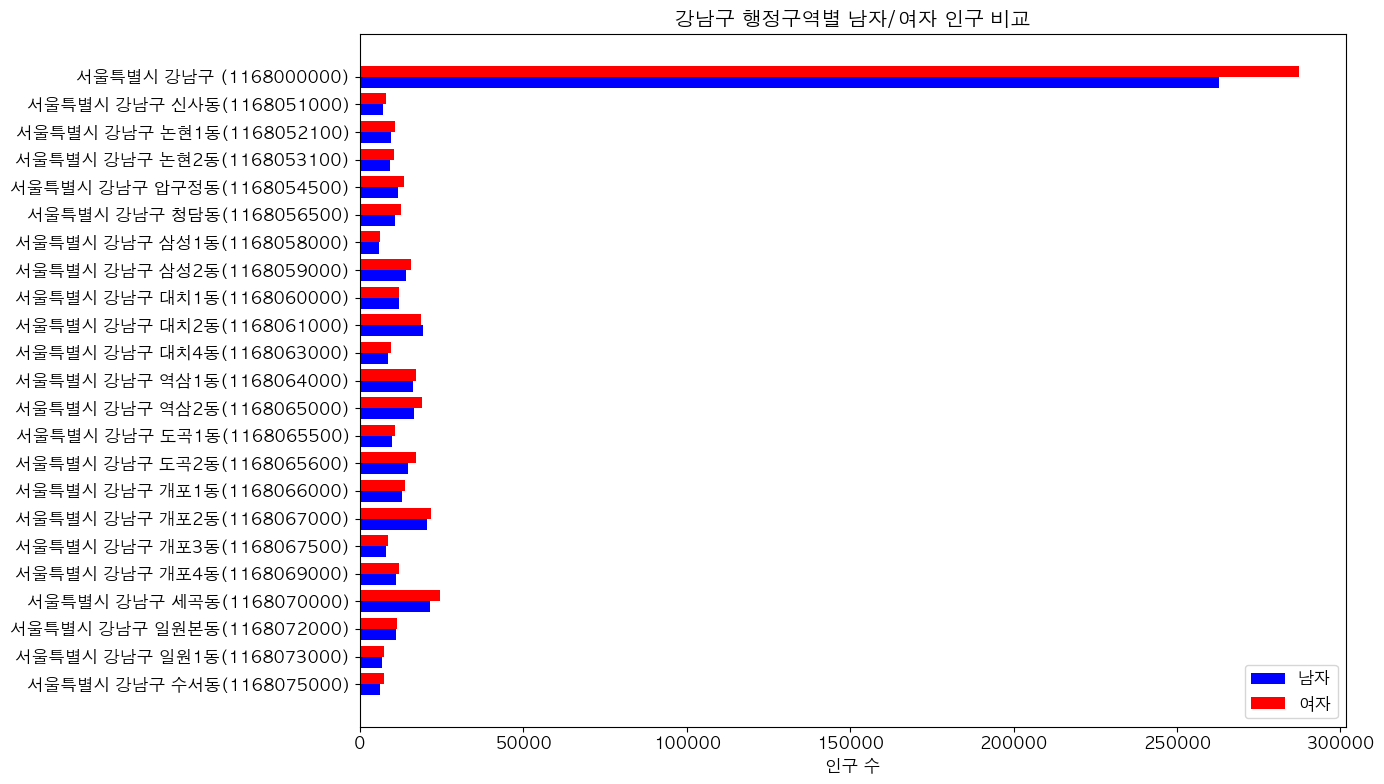

In [6]:
pop_2['남자 인구수'] = pop_2['남자 인구수'].str.replace(',', '').astype(int)
pop_2['여자 인구수'] = pop_2['여자 인구수'].str.replace(',', '').astype(int)

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(pop_2))

plt.barh([i + bar_width for i in index], pop_2['남자 인구수'], bar_width, label='남자', color='blue')
plt.barh(index, pop_2['여자 인구수'], bar_width, label='여자', color='red')

plt.yticks([i + bar_width / 2 for i in index], pop_2['행정구역'])
plt.xlabel('인구 수')
plt.title('강남구 행정구역별 남자/여자 인구 비교')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [15]:
행정구역 = [
    '서울특별시 강남구', '신사동', '논현1동', '논현2동', '압구정동', '청담동',
    '삼성1동', '삼성2동', '대치1동', '대치2동', '대치4동', '역삼1동',
    '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포2동', '개포3동',
    '개포4동', '세곡동', '일원본동', '일원1동', '수서동'
]

인구수 = [
    550080, 14935, 20184, 19591, 25141, 23481,
    12274, 29840, 23766, 37913, 17960, 33350,
    35607, 20449, 31958, 26446, 42063, 16520,
    22756, 45903, 22409, 14117, 13417
]



위도 = [
    37.5172, 37.5165, 37.5118, 37.5109, 37.5271, 37.5234,
    37.5146, 37.5141, 37.4982, 37.4948, 37.4916, 37.5009,
    37.4954, 37.4925, 37.4895, 37.4838, 37.4843, 37.4822,
    37.4801, 37.4673, 37.4834, 37.4830, 37.4880
]


경도 = [
    127.0473, 127.0203, 127.0220, 127.0352, 127.0286, 127.0510,
    127.0590, 127.0636, 127.0626, 127.0665, 127.0632, 127.0364,
    127.0456, 127.0412, 127.0469, 127.0620, 127.0668, 127.0585,
    127.0611, 127.1040, 127.0845, 127.0820, 127.1030
]


df = pd.DataFrame({
    '행정구역': 행정구역,
    '인구수': 인구수,
    '위도': 위도,
    '경도': 경도
})


m = folium.Map(location=[37.4916, 127.0632], zoom_start=13)

for _, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        population_text = f"{row['인구수']:,}명" if row['인구수'] > 0 else "정보 없음" # 0명일 경우 다르게 표시 (선택사항)
        popup = f"<b>{row['행정구역']}</b><br>인구수: {population_text}"
        if row['인구수'] >= 200000:
            color = 'orange' 
        elif row['인구수'] >= 25000:
            color = 'red'
        else:
            color = 'blue'
        
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=popup,
            tooltip=row['행정구역'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

#m.save("gangnam_population_map.html")
m
